In [128]:
import pandas as pd
# from openpyxl import load_workbook
import lagrangian_case as lc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import rcParams
from cycler import cycler
import matplotlib as mpl
import os
import utils
import met_utils as mu
import xarray as xr
from matplotlib import dates as mpldates
from scipy import stats
old_settings = np.seterr(invalid='ignore')  #seterr to known value
import warnings
import datetime as dt
import glob
from CSET_data_classes import CSET_Flight_Piece, CSET_Flight
warnings.simplefilter("ignore")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
case = lc.all_cases[10]
TLC = lc.TrajectoryCase(case['TLC_name'])
TLC.add_traj_data()
ALC = lc.AircraftCase(case['ALC_name'])
ALC.add_ERA_data()
# ALC.add_precip_data()


TypeError: 

In [33]:
lats = TLC.traj_data['5.5'].lat
lons = TLC.traj_data['5.5'].lon%360
times = TLC.traj_data['5.5'].time
all_ERA_files = sorted(glob.glob(r'/home/disk/eos4/jkcm/Data/CSET/ERA5/ERA5.pres*.nc'))
ERA_data = xr.open_mfdataset(all_ERA_files)

In [119]:
for i in range(5):
    print(f'{i:02d}')

00
01
02
03
04


In [136]:
f'{lon.values:02.1f}'

'229.8'

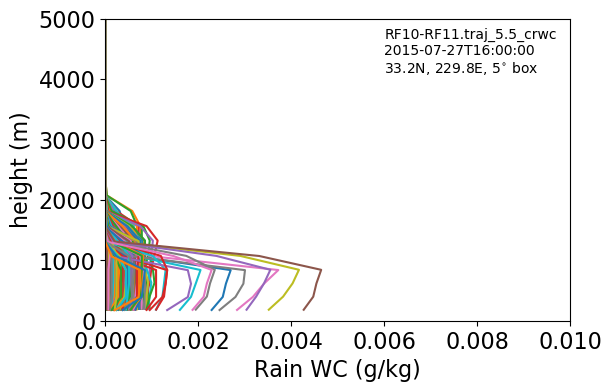

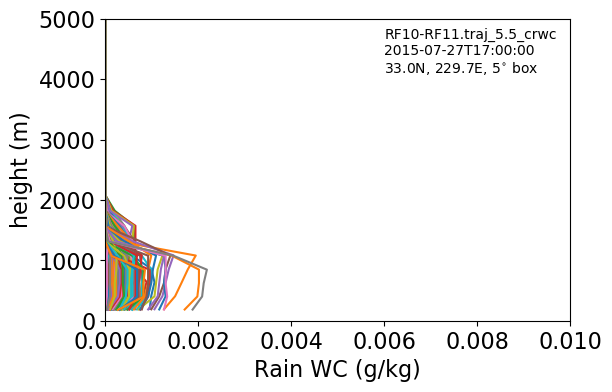

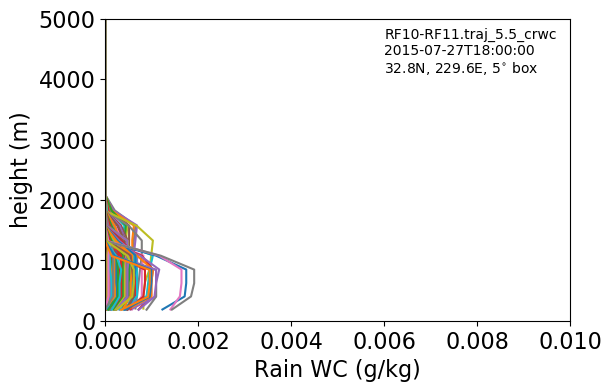

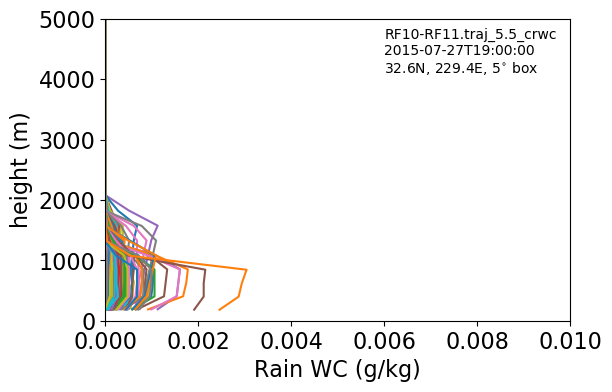

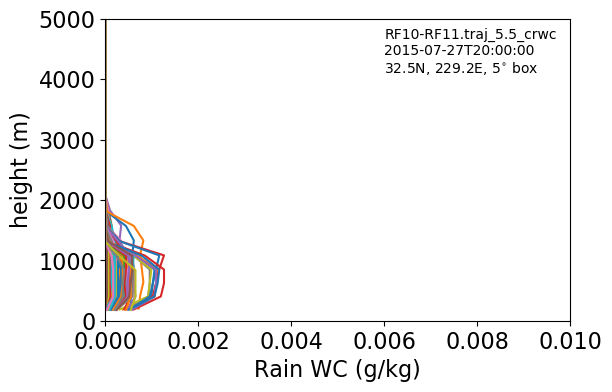

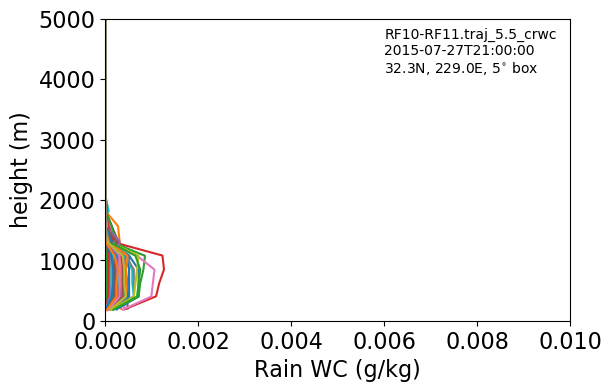

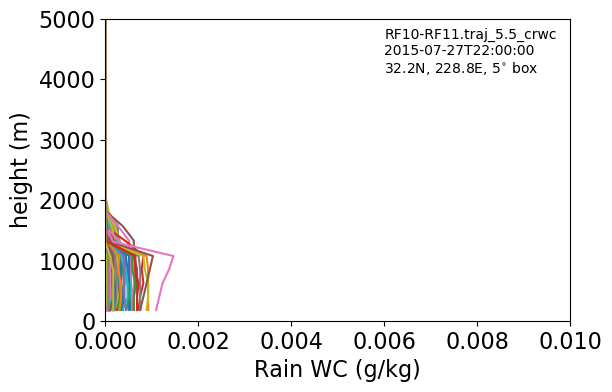

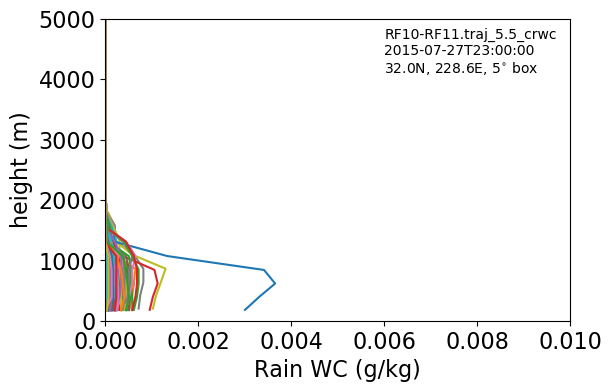

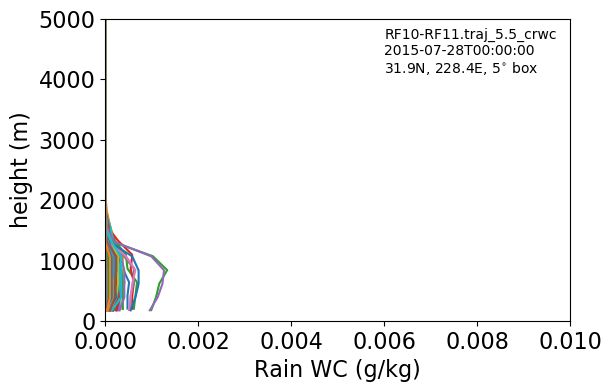

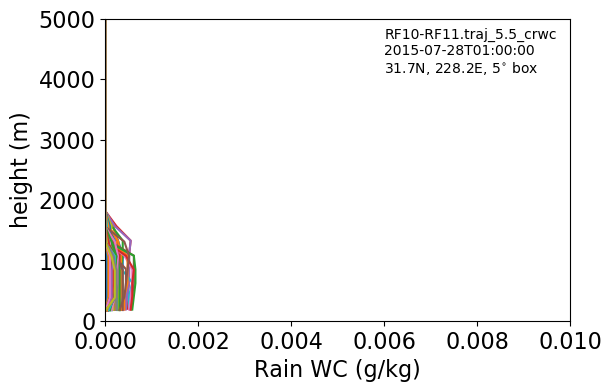

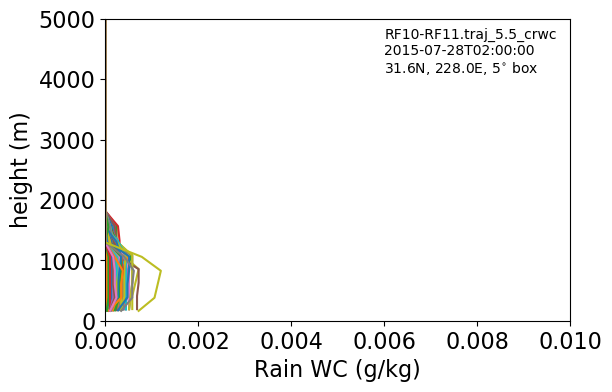

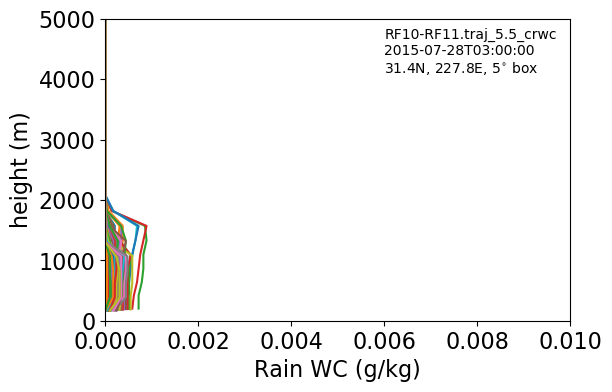

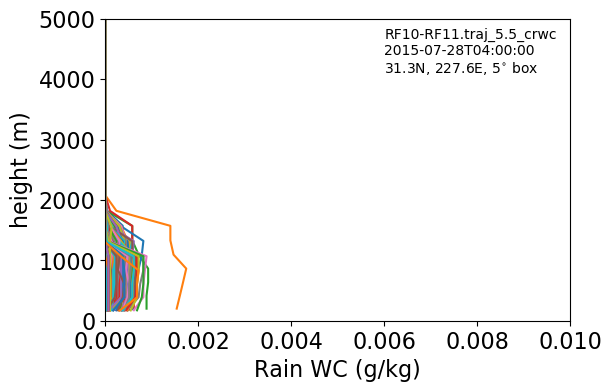

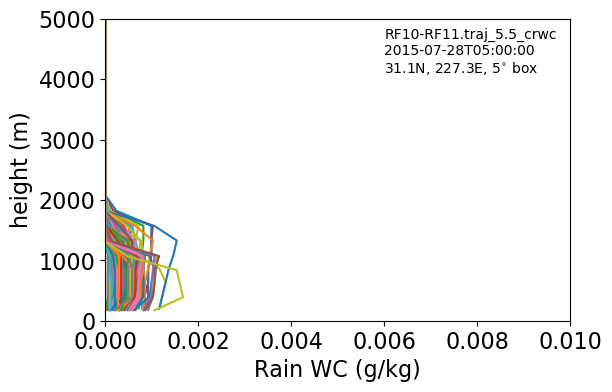

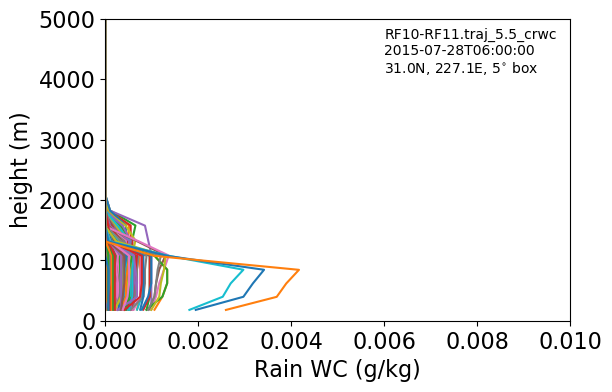

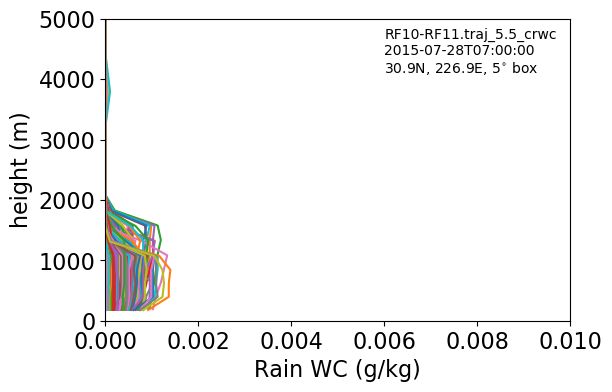

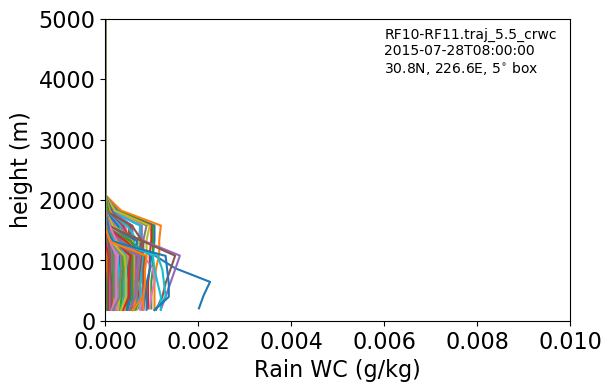

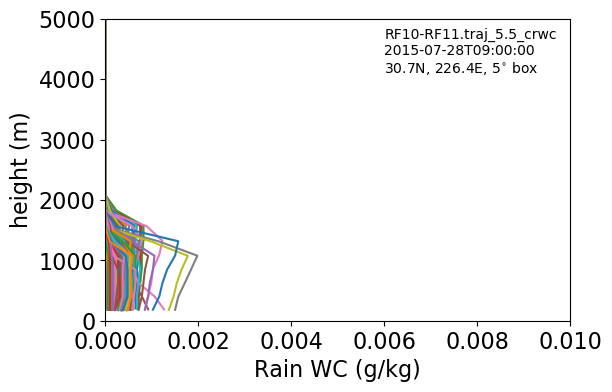

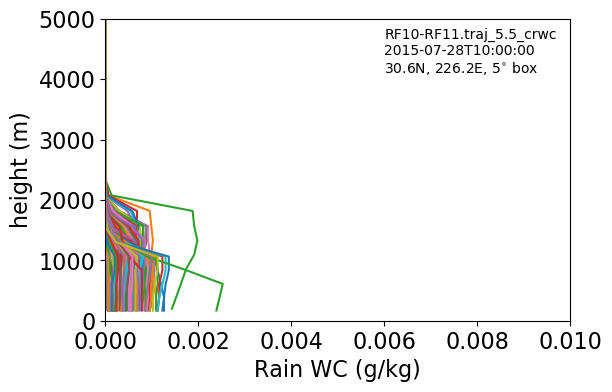

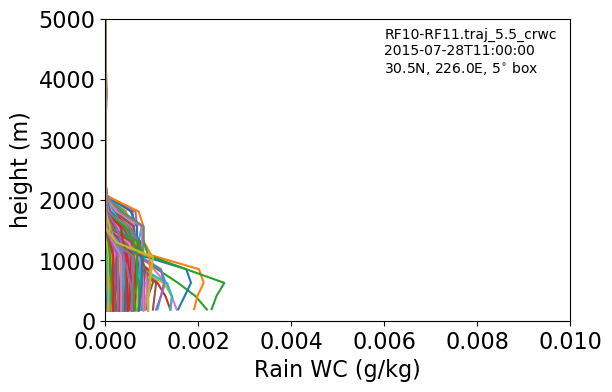

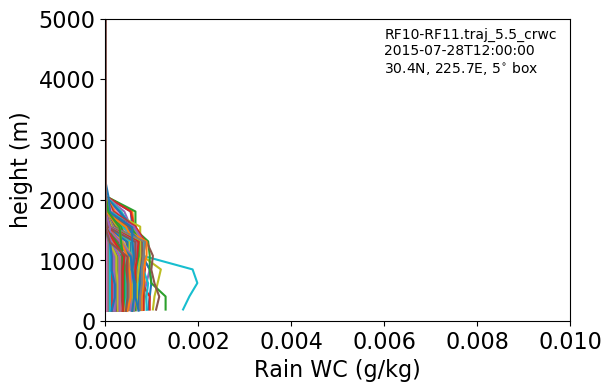

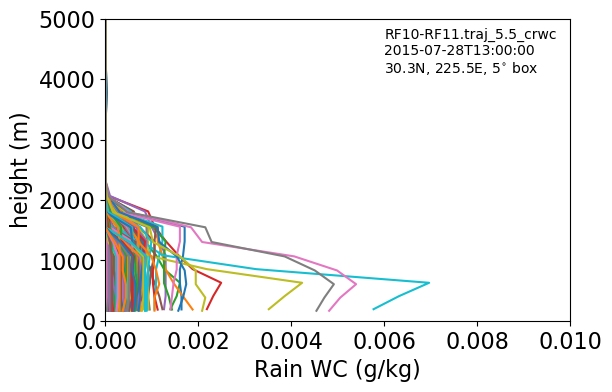

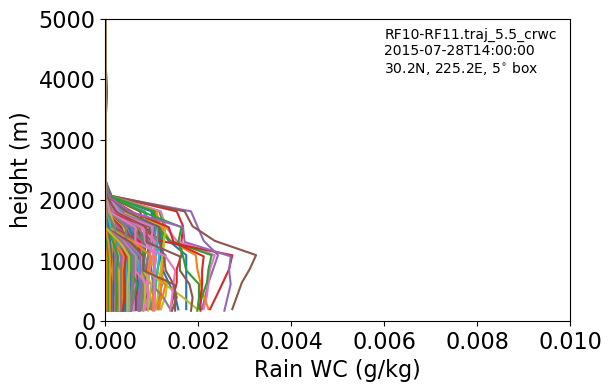

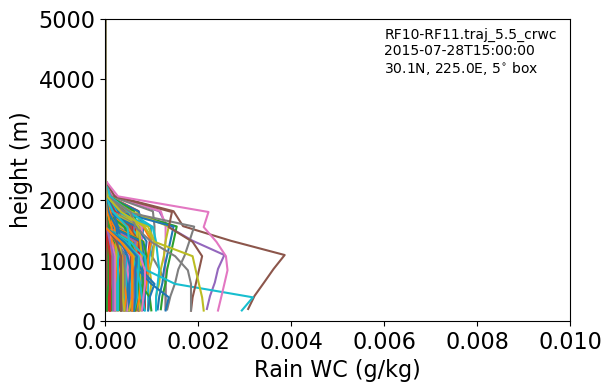

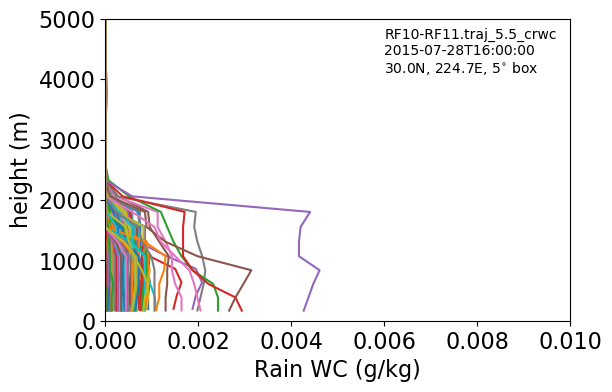

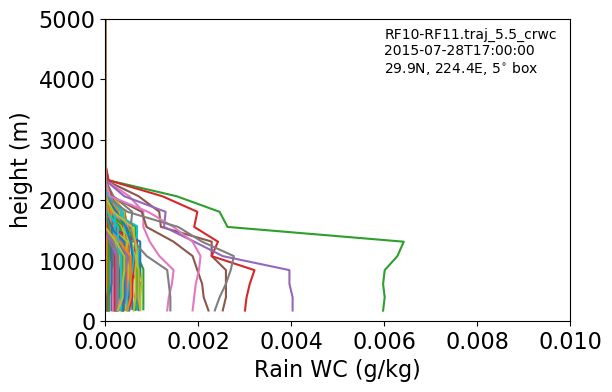

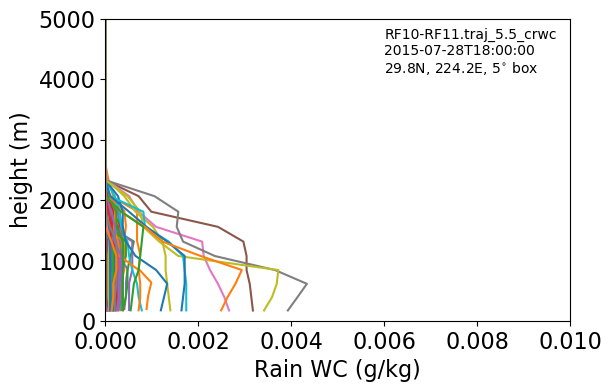

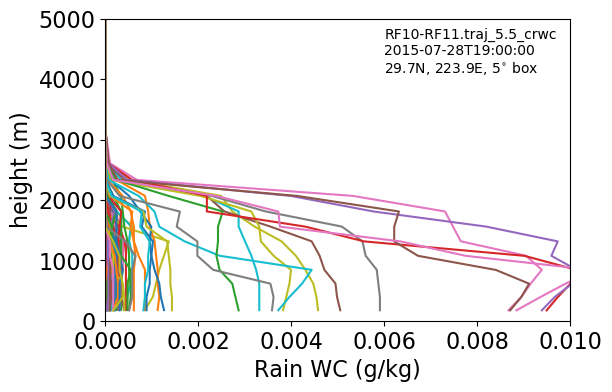

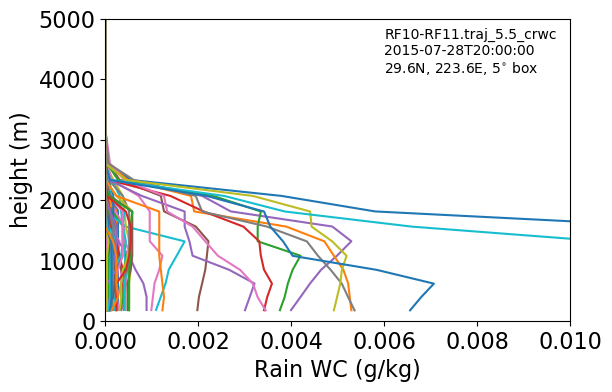

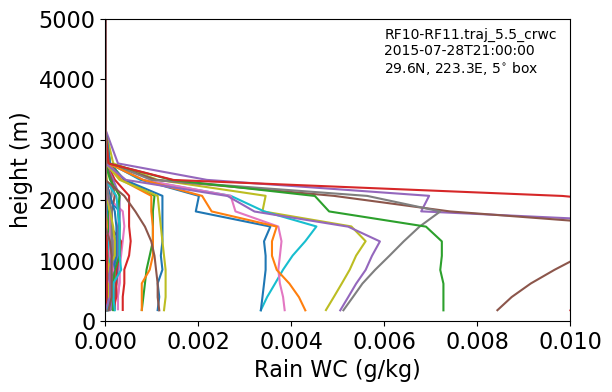

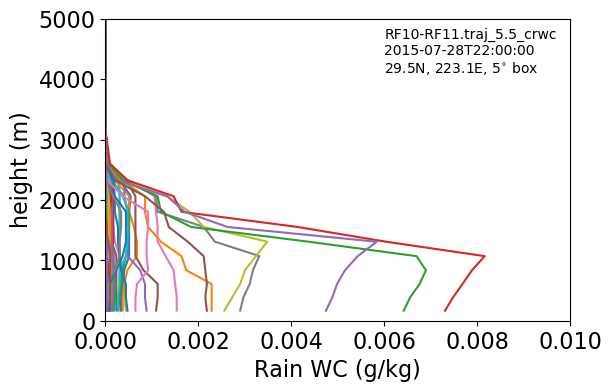

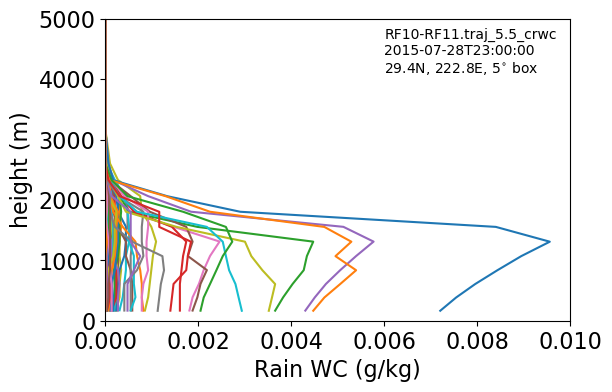

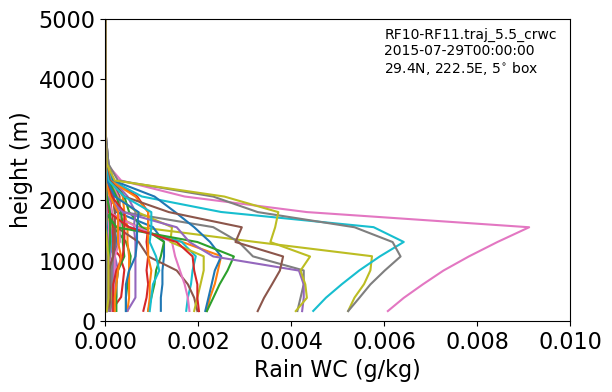

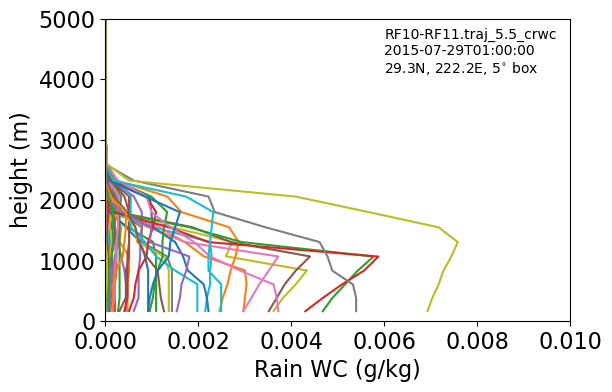

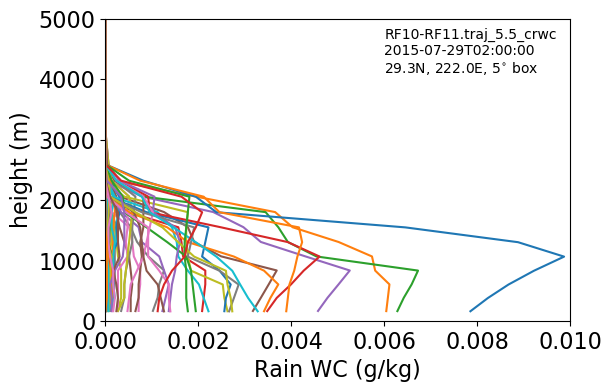

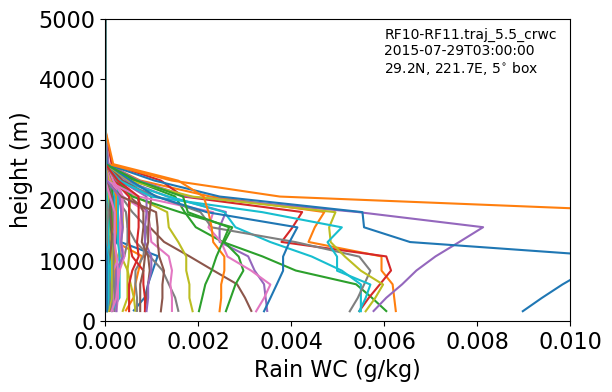

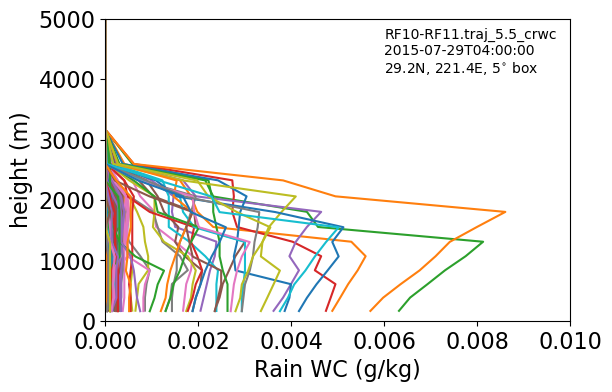

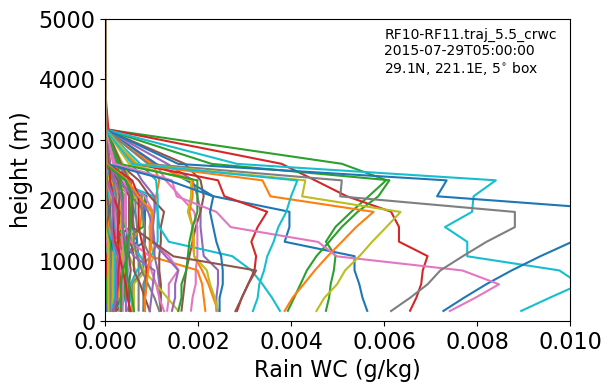

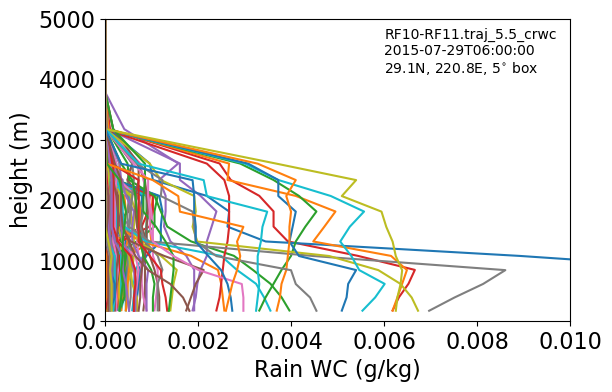

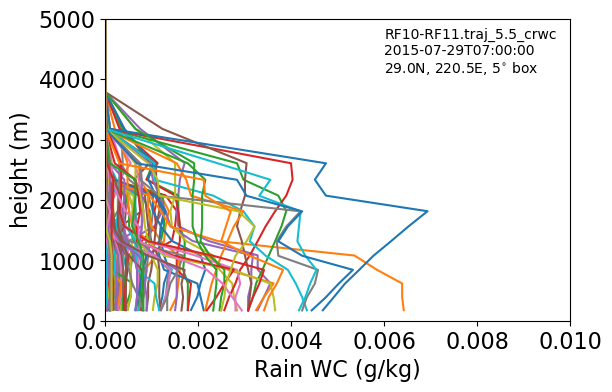

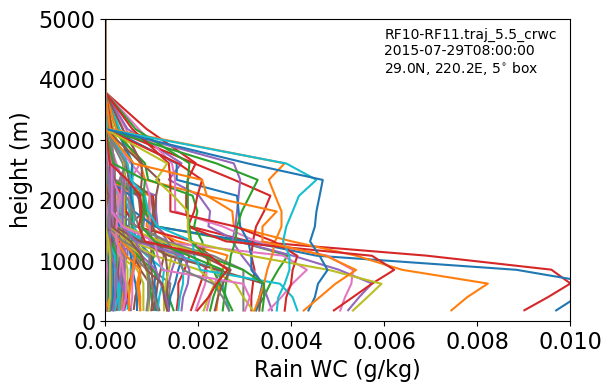

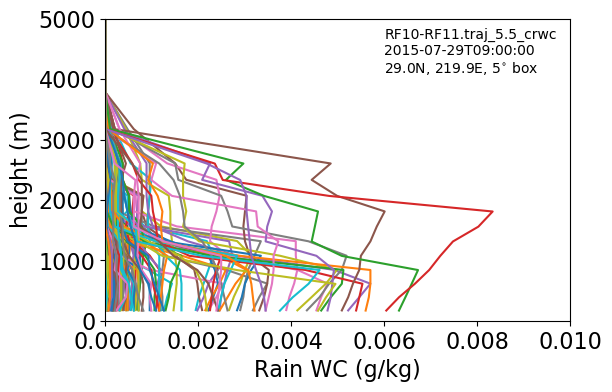

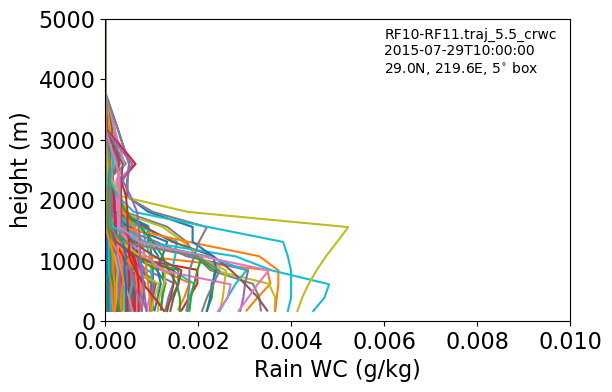

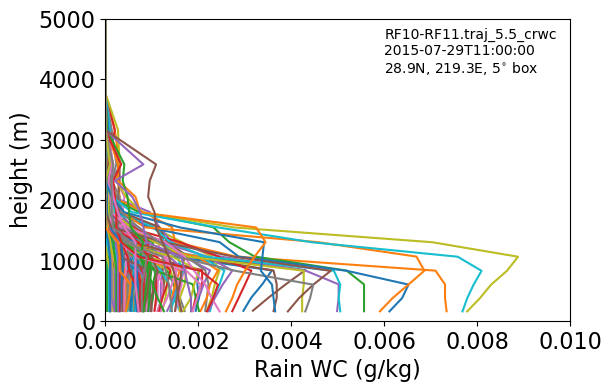

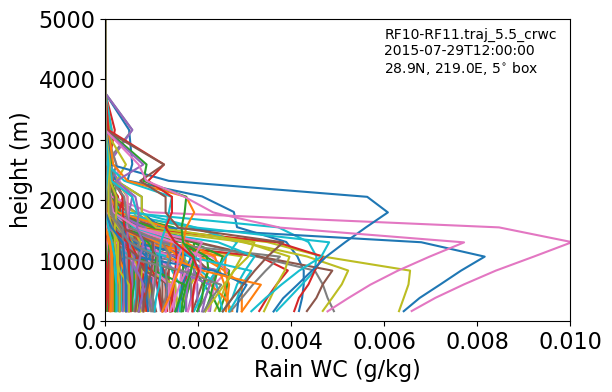

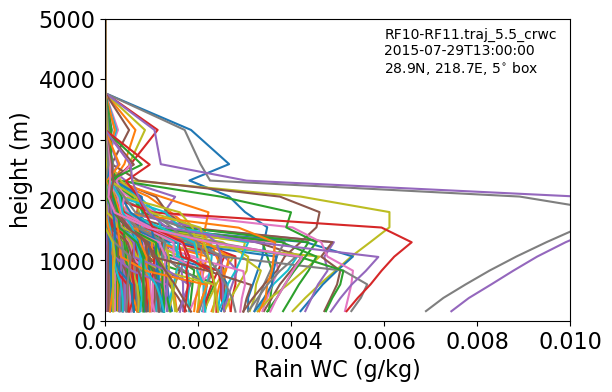

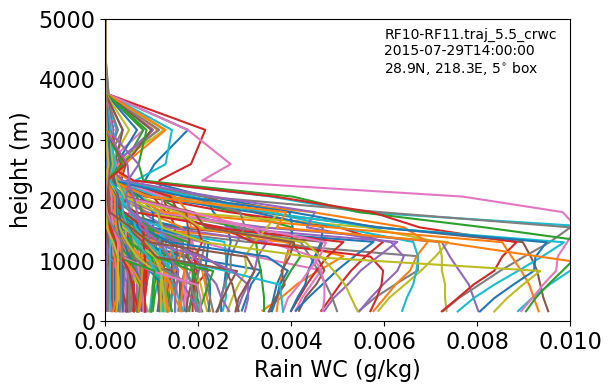

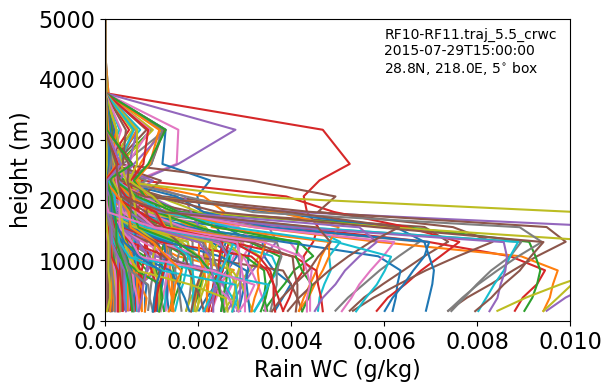

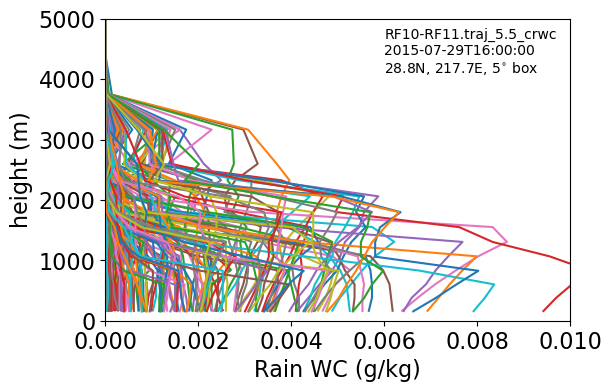

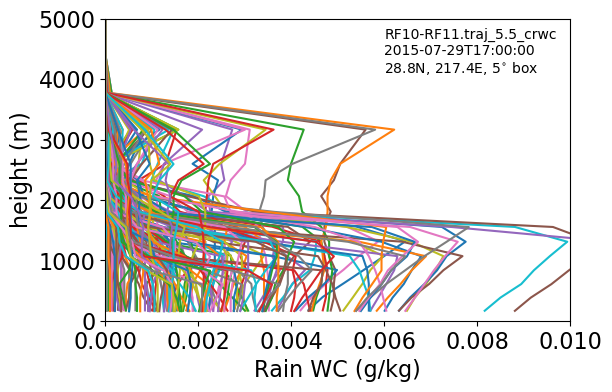

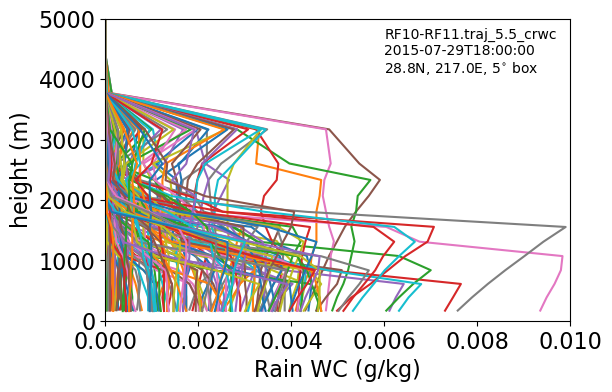

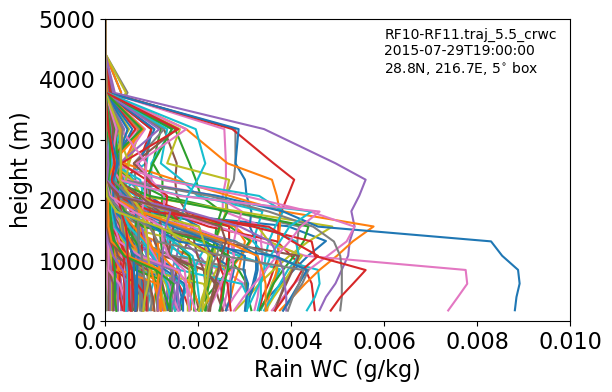

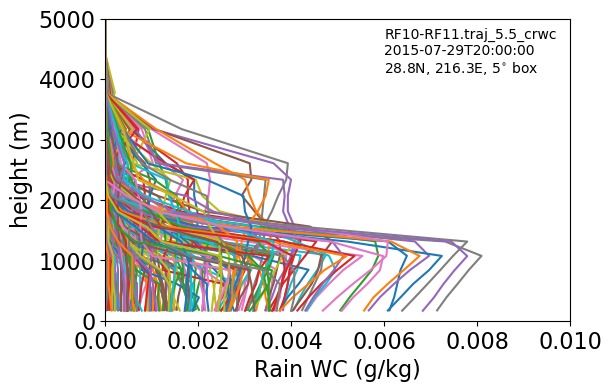

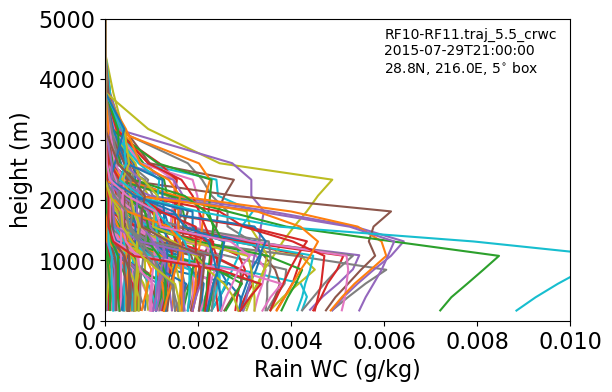

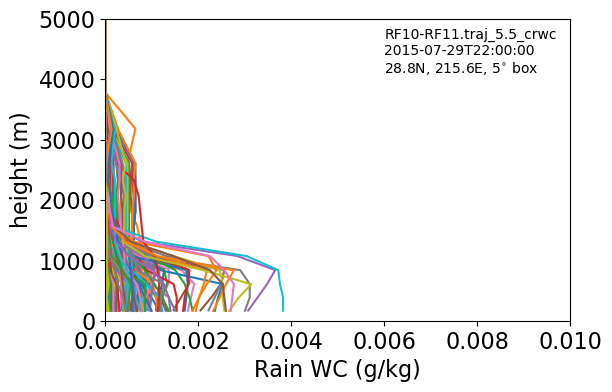

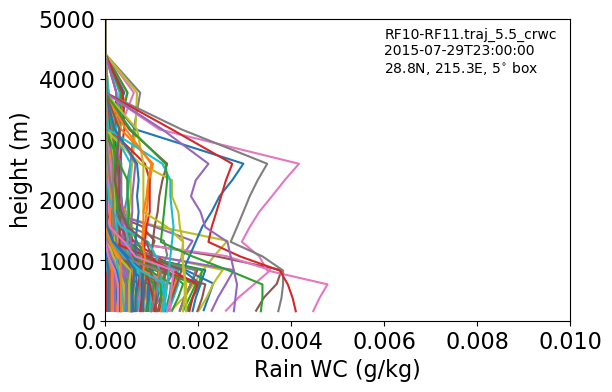

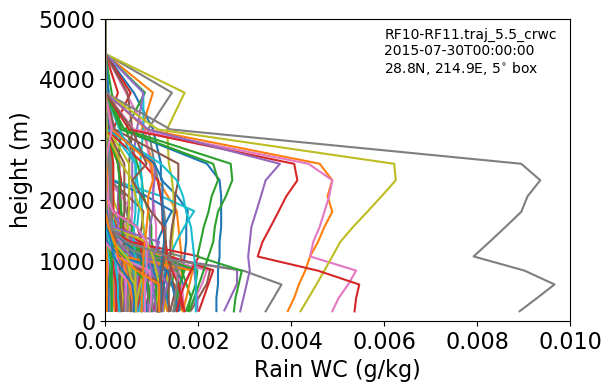

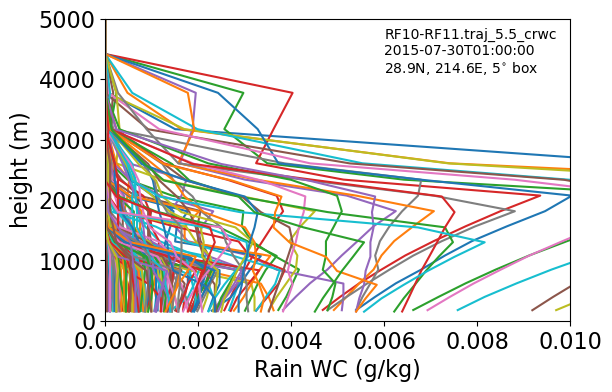

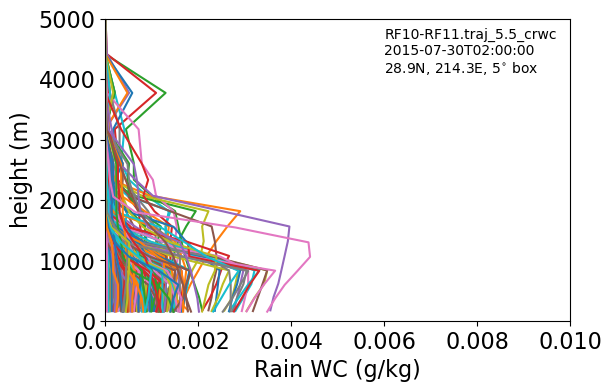

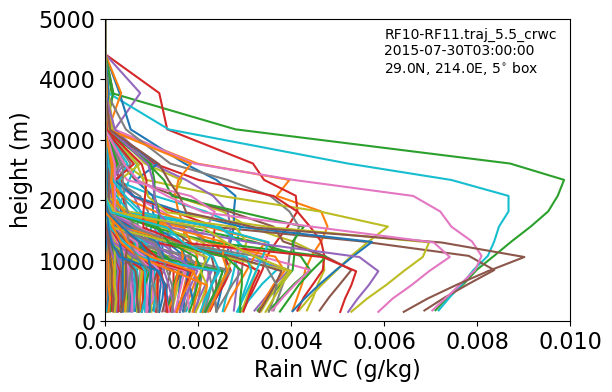

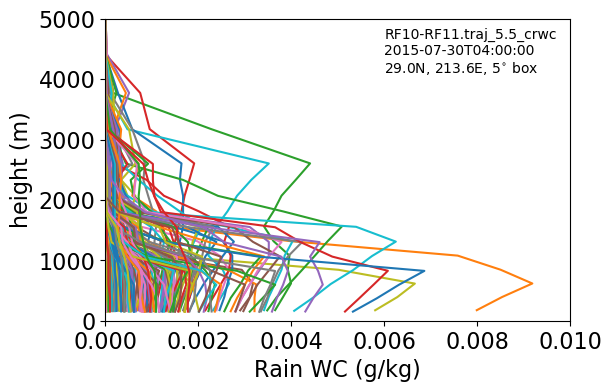

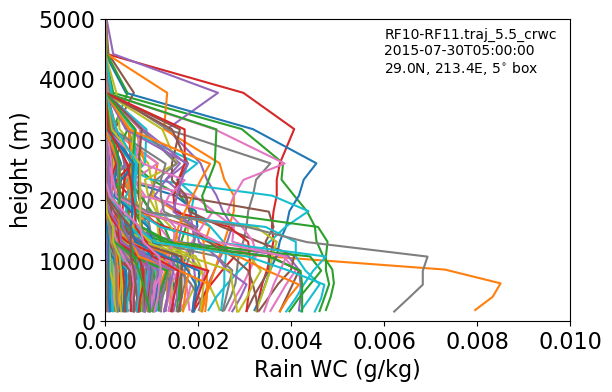

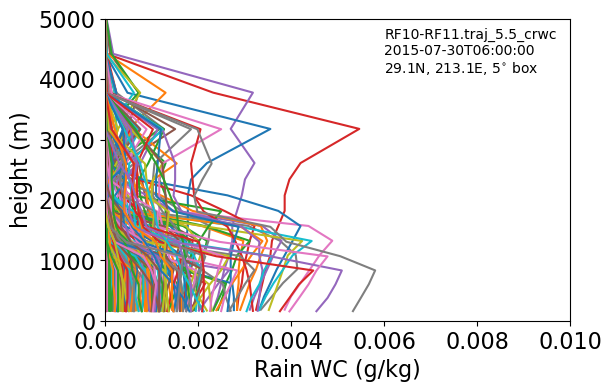

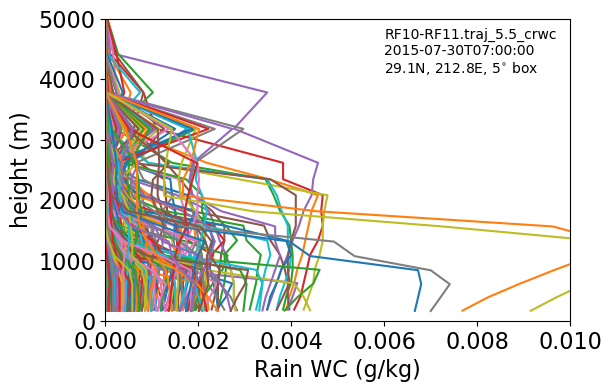

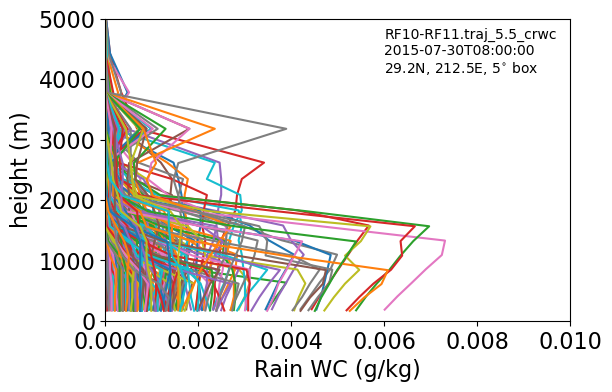

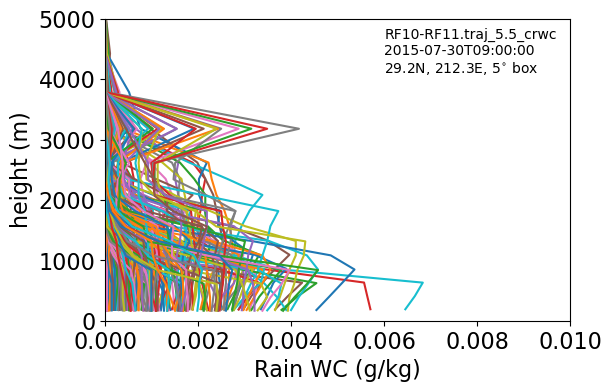

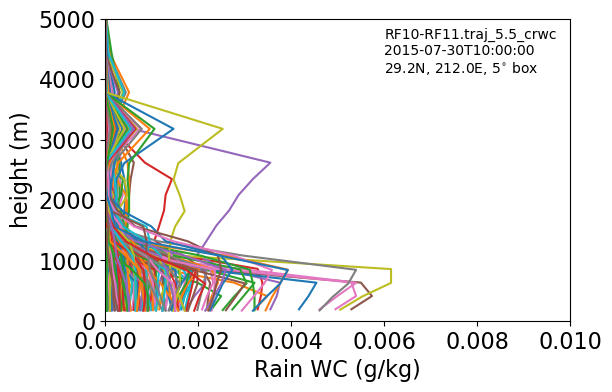

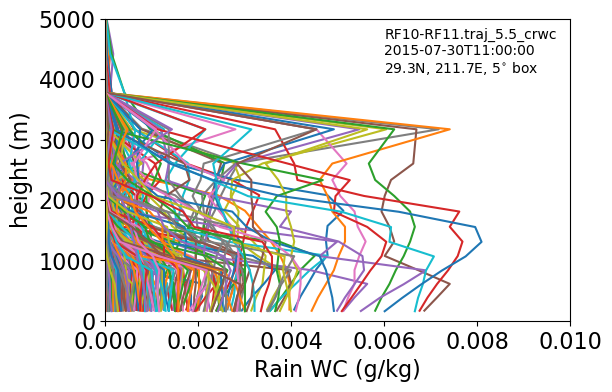

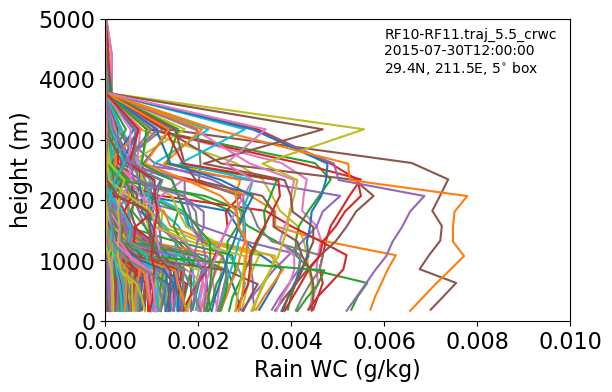

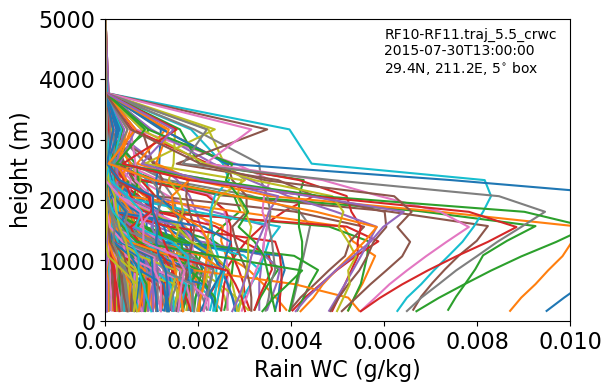

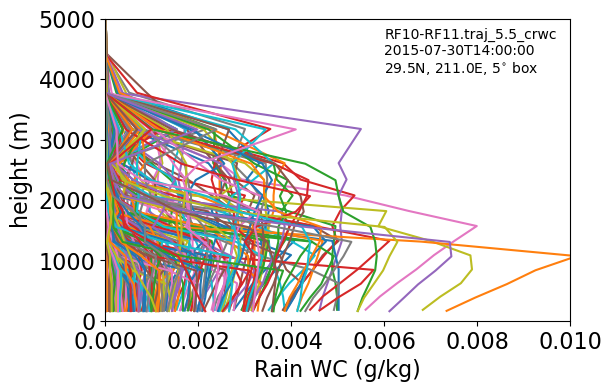

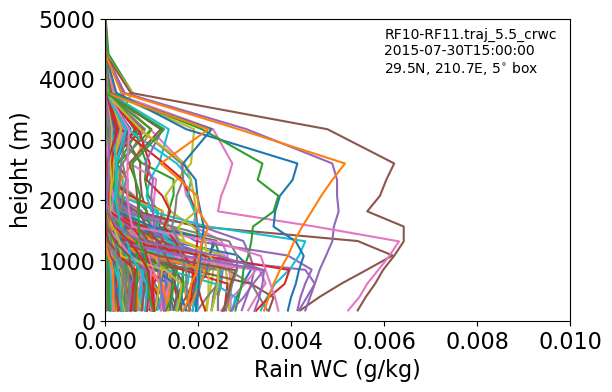

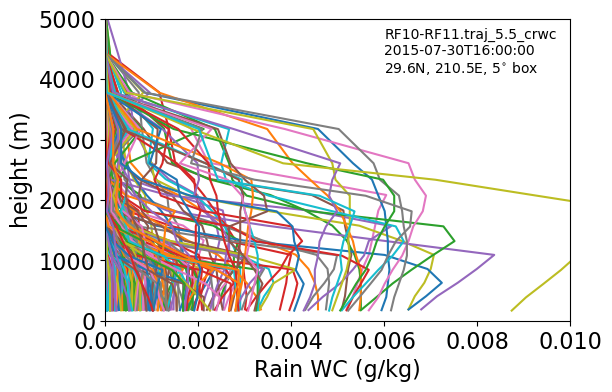

In [151]:
box_degrees=5
name = 'RF10-RF11.traj_5.5'
# var = 'r'
# var_label = 'RH (%)'
# xmax = 100
scale = 1

var = 'crwc'
var_label = 'Rain WC (g/kg)'
xmax = 0.01
scale = 1000

for i, (lat,lon,time) in enumerate(zip(lats, lons,times)):
# if True:
#     lat, lon, time = lats[0], lons[0], times[0]
#     i = 0
    x = ERA_data[var].sel(longitude=slice(lon - box_degrees/2, lon + box_degrees/2),
                                      latitude=slice(lat + box_degrees/2, lat - box_degrees/2))
    z = x.sel(method='nearest', time=time, tolerance=np.timedelta64(1, 'h'))

    g1 = ERA_data['z'].sel(longitude=slice(lon - box_degrees/2, lon + box_degrees/2),
                                      latitude=slice(lat + box_degrees/2, lat - box_degrees/2))
    g2 = g1.sel(method='nearest', time=time, tolerance=np.timedelta64(1, 'h'))/9.81
    z_flat = z.values.reshape(z.shape[0], -1) * scale
    g2_flat = g2.values.reshape(g2.shape[0], -1)
    
    fig, ax = plt.subplots()
    ax.plot(z_flat, g2_flat)
    ax.set_ylim(0, 5000)
    ax.set_xlim(0, xmax)
    ax.set_ylabel('height (m)')
    ax.set_xlabel(var_label);
    ax.annotate(f'{name}_{var}\n{str(time.values)[:19]}\n{lat.values:02.1f}N, {lon.values:02.1f}E, {box_degrees}'+r'$^{\circ}$ box', xy=(0.6, 0.82), xycoords='axes fraction', fontsize=10);
    fig.savefig(f'/home/disk/eos4/jkcm/Data/CSET/Peter/movies/vid_{name}_{var}_{i:02d}.png');


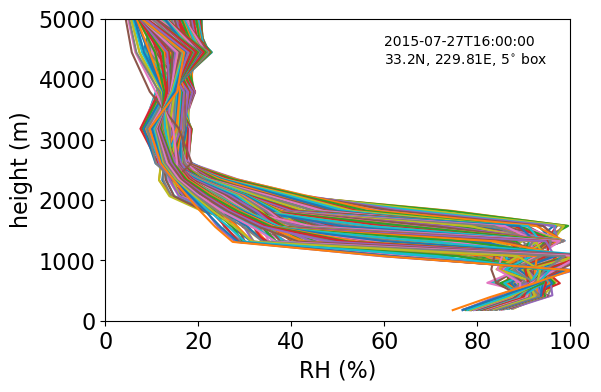

In [114]:
fig, ax = plt.subplots()
ax.plot(z_flat, g2_flat)
ax.set_ylim(0, 5000)
ax.set_xlim(0, 100)
ax.set_ylabel('height (m)')
ax.set_xlabel('RH (%)');
ax.annotate(f'{str(time.values)[:19]}\n{lat.values}N, {lon.values}E, {box_degrees}'+r'$^{\circ}$ box', xy=(0.6, 0.85), xycoords='axes fraction', fontsize=10);
fig.savefig(f'/home/disk/eos4/jkcm/Data/CSET/Peter/movies/vid_{name}_{va}_{i}.png')

In [ ]:
# make animation of ...something...in a 10x10 box centered on the trajectory. 


In [14]:
TLC.traj_data['5.5']

<xarray.Dataset>
Dimensions:            (ens_level: 12, level: 37, number: 10, time: 73)
Coordinates:
  * time               (time) datetime64[ns] 2015-07-27T16:00:00 ... 2015-07-30T16:00:00
  * level              (level) float64 1.0 2.0 3.0 5.0 ... 950.0 975.0 1e+03
  * number             (number) int32 0 1 2 3 4 5 6 7 8 9
  * ens_level          (ens_level) int32 700 750 775 800 ... 925 950 975 1000
Data variables:
    fhour              (time) timedelta64[ns] ...
    lat                (time) float64 ...
    lon                (time) float64 ...
    height             (time) float64 ...
    pres               (time) float64 ...
    traj_u             (time) float64 ...
    traj_v             (time) float64 ...
    traj_hdg           (time) float64 ...
    traj_spd           (time) float64 ...
    ERA_crwc           (time, level) float64 ...
    ERA_clwc           (time, level) float64 ...
    ERA_cc             (time, level) float64 ...
    ERA_w              (time, level) float64 0.